# Measuring the Success of Vision Zero: Top 60 Priority Intersections
#### Jessica T. Lopez

For Week Seven, the [Top 60 Priority Intersections](https://jupyter.idre.ucla.edu/hub/user-redirect/lab/tree/data/Top_60_Priority_Intersections.zip), which includes all the intersections that have been prioritized for the development of safety projects in Los Angeles, was 'cleaned up' to reflect where the priority intersections fall in Los Angeles. By changing the basemap it is more clear to see their locations. 

In [37]:
# importing pandas and geopandas
import pandas as pd
import geopandas as gpd

In [38]:
# now importing data for the first data set 'Top 60 Priority Intersections'
df = pd.read_csv('Week 7 Data/Top_60_Priority_Intersections_Copy.csv')

In [39]:
#checking on data type
type(df)

pandas.core.frame.DataFrame

In [40]:
# a peak into how the data looks
df.head (11)

,longitude,latitude,ObjectID,Intersection
0,-118.293400,33.763911,1,Gaffey St & Westmont Dr
1,-118.553566,34.220468,2,Tampa Ave & Roscoe Blvd
2,-118.571047,34.220205,3,Roscoe Blvd & Winnetka Ave
3,-118.288421,34.235491,4,La Tuna Canyon Rd & Rt 210 E/b Off
4,-118.535739,34.035819,5,Pacific Coast Hwy & Temescal Canyon Rd
5,-118.475667,34.171738,6,Burbank Blvd & Woodley Ave
6,-118.256491,34.003943,7,Vernon Ave & Central Ave
7,-118.434886,33.930826,8,Vista Del Mar & Imperial Hwy
8,-118.350916,34.032524,9,La Brea Ave & Adams Blvd
9,-118.291891,33.960030,10,Manchester Ave & Vermont Ave


In [41]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     60 non-null     float64
 1   latitude      60 non-null     float64
 2   ObjectID      60 non-null     int64  
 3   Intersection  60 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [42]:
df.dtypes

longitude       float64
latitude        float64
ObjectID          int64
Intersection     object
dtype: object

In [43]:
df.shape 
# looking the total rows and columns

(60, 4)

In [44]:
#now I want to take a look closer look at all the columns to see if I need to trim anything
df.columns.to_list()

['longitude', 'latitude', 'ObjectID', 'Intersection']

In [45]:
# checking data for latitude and longitude columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     60 non-null     float64
 1   latitude      60 non-null     float64
 2   ObjectID      60 non-null     int64  
 3   Intersection  60 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [46]:
columns_to_keep = ['longitude','latitude','Intersection']
#add it to new data frame
df2 = df[columns_to_keep]

In [47]:
# renaming the columns
columns = list (df2)
columns

['longitude', 'latitude', 'Intersection']

In [48]:
df2.columns=['longitude', 'latitude', 'Intersection']

In [49]:
# now checking dataset for new names
df2.sample(4)

,longitude,latitude,Intersection
1,-118.553566,34.220468,Tampa Ave & Roscoe Blvd
52,-118.383411,34.179418,Lankershim Blvd & Oxnard St
13,-118.217734,34.023371,Olympic Blvd & Orme Ave
28,-118.448177,34.247076,Van Nuys Blvd & Woodman Ave


### From Dataframe(df) to Geodataframe(gdf) 

Since this data set contains latitude and longitude coordinates I will have to convert the dataframe(df) to geodataframe(gdf).
One thing to note, as per Week 4 lab, if the data has latitude and longitude coordinates, it is a geographic coordinate system (GCS) with a crs code epsg:4326.

In [50]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

### What is the Projection?

In [51]:
#output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Just as in week 4 lab, the output here is WGS84 as well. Indicating that the data is in geographic coordinate system.

In [52]:
import matplotlib.pyplot as plt
import contextily as ctx

In the cell below is where the changes have taken place. The basemap has changed along with an increased marker size.

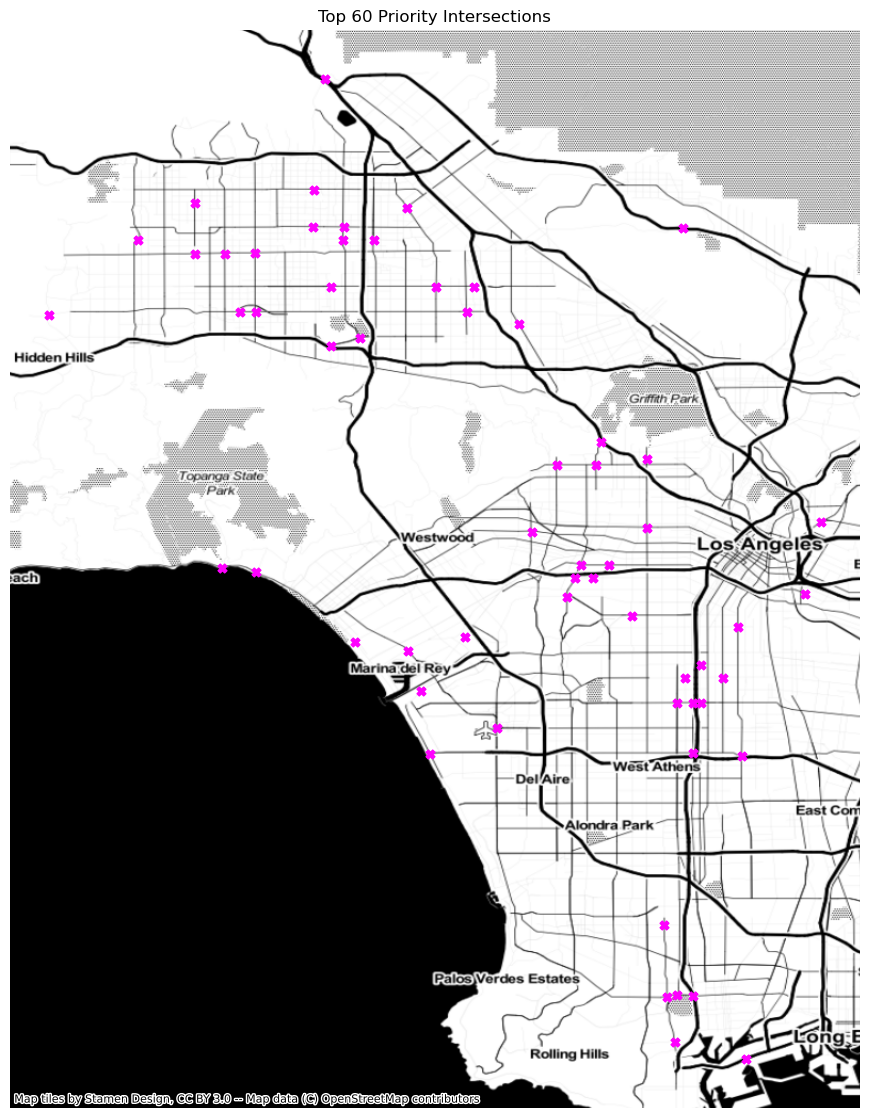

In [53]:
# start the plot
fig, ax = plt.subplots(figsize=(14,14))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=40,
        color='magenta'
    )

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Top 60 Priority Intersections')

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=4326) # note that we must specify the projection here (crs)

This map is a work in progress. In the near future, the goal is to enhance it by adding income demographics to visualize if there are any disparities in their placement.